In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import scipy
import librosa.display
from IPython.display import Audio
import random

In [3]:
ultrasound = 'Nick-hig/2.wav'
Audio(ultrasound)

In [17]:
sample_rate, samples = scipy.io.wavfile.read(ultrasound) 
print("This utterance has {} samples\nSample rate is {}".format(samples.shape[0], sample_rate))

This utterance has 96015 samples
Sample rate is 48000


This utterance has 384615 samples
Sample rate is 192000
Shape of Original Xdb-time is (1025, 752)


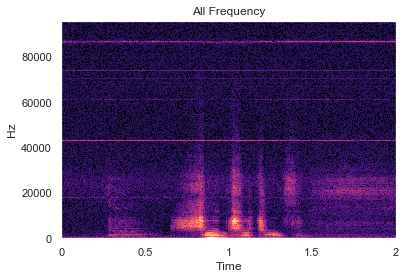

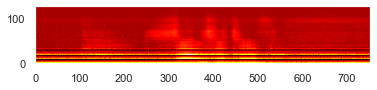

In [54]:
ultrasound = 'Nick-hig/2.wav'
sample_rate, samples = scipy.io.wavfile.read(ultrasound) 
print("This utterance has {} samples\nSample rate is {}".format(samples.shape[0], sample_rate))
X = librosa.stft(samples.astype('float'))
Xdb = librosa.amplitude_to_db(X)
print("Shape of Original Xdb-time is {}".format(Xdb.shape))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.title('All Frequency')
plt.show()
Xdb = np.abs(Xdb) ** 2
mel_basis = librosa.filters.mel(sr=sample_rate, n_fft=2048, n_mels=128)
S = np.log10(np.dot(mel_basis, Xdb) + 1e-6)
# librosa.display.specshow(S, sr=sample_rate, x_axis='time', y_axis='hz')
plt.imshow(np.dot(mel_basis, Xdb), cmap='hot', origin = 'lower')
plt.show()

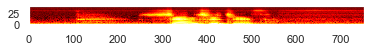

In [42]:
Xdb = np.abs(Xdb) ** 2
mel_basis = librosa.filters.mel(sr=sample_rate, n_fft=2048, n_mels=40)
S = np.log10(np.dot(mel_basis, Xdb) + 1e-6)
# librosa.display.specshow(S, sr=sample_rate, x_axis='time', y_axis='hz')
plt.imshow(S, cmap='hot', origin = 'lower')
plt.show()

This utterance has 96015 samples
Sample rate is 48000
Shape of Original Xdb-time is (1025, 188)


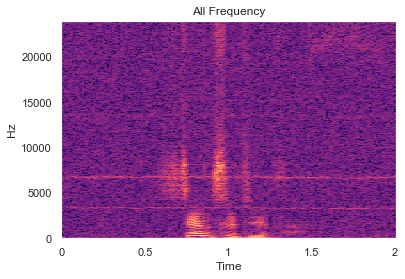

In [19]:
ultrasound = 'Nick-low/2.wav'
sample_rate, samples = scipy.io.wavfile.read(ultrasound) 
print("This utterance has {} samples\nSample rate is {}".format(samples.shape[0], sample_rate))
X = librosa.stft(samples.astype('float'))
Xdb = librosa.amplitude_to_db(X)
print("Shape of Original Xdb-time is {}".format(Xdb.shape))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.title('All Frequency')
plt.show()

In [ ]:
fr_resolution = (sample_rate/2)/(Xdb.shape[0]-1) # indicate each row frequency gap 


Lower frequency bound index is 341


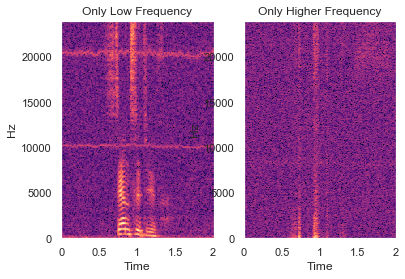

(341, 188)


In [20]:
fr_resolution = (sample_rate/2)/(Xdb.shape[0]-1)
lower_b = 8e3 # lower bound is 8k Hz
lower_fr_idx = round(lower_b / fr_resolution)
lower = Xdb[:lower_fr_idx]
higher = Xdb[lower_fr_idx:]
print("Lower frequency bound index is {}".format(lower_fr_idx))
plt.subplot(1,2,1)
librosa.display.specshow(lower, sr=sample_rate, x_axis='time', y_axis='hz')
plt.title('Only Low Frequency')
plt.subplot(1,2,2)
librosa.display.specshow(higher, sr=sample_rate, x_axis='time', y_axis='hz')
plt.title('Only Higher Frequency')
plt.show()
print(lower.shape)

Lower frequency bound index is 341
(341, 188)
<a list of 9 Text yticklabel objects> [-50.   0.  50. 100. 150. 200. 250. 300. 350.]


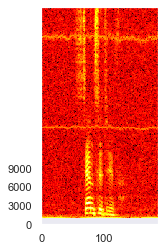

In [21]:
fr_resolution = (sample_rate/2)/(Xdb.shape[0]-1)
lower_b = 8e3 # lower bound is 8k Hz
lower_fr_idx = round(lower_b / fr_resolution)
print("Lower frequency bound index is {}".format(lower_fr_idx))
lower = Xdb[:lower_fr_idx]
print(lower.shape)
plt.imshow(lower, cmap='hot', origin = 'lower')
pos,labels = plt.yticks()
print(labels,pos)
plt.rcParams["axes.grid"] = False 
plt.yticks([-10,20,50,80],np.arange(0, 10000, step=3000))

plt.show()

In [10]:
# tisv_frame = 180
# hop_time = 0.01
# window_length_time = 0.025
sample_rate = 192000
n_fft = 2048

(40, 188)


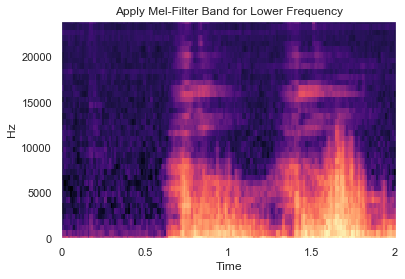

In [69]:
Xdb = np.abs(Xdb) ** 2
mel_basis = librosa.filters.mel(sr=sample_rate, n_fft=n_fft, n_mels=40)
print(lower.shape)
Xdb = np.log10(np.dot(mel_basis, Xdb)+1e-6)
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.title("Apply Mel-Filter Band for Whole Frequency Spectrum")
plt.show()

(341, 188)


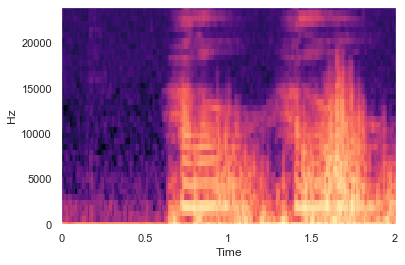

In [67]:
lower = np.abs(lower) ** 2
mel_basis = librosa.filters.mel(sr=sample_rate, n_fft=lower.shape[0]*2-1, n_mels=40)
print(lower.shape)
lower = np.log10(np.dot(mel_basis, lower)+1e-6)
librosa.display.specshow(lower, sr=sample_rate, x_axis='time', y_axis='hz')
plt.title("Apply Mel-Filter Band for Lower Frequency")
plt.show()

(40, 188)


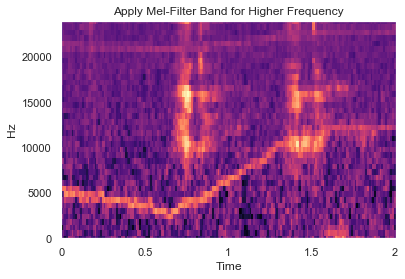

In [68]:
higher = np.abs(higher) ** 2
mel_basis = librosa.filters.mel(sr=sample_rate, n_fft=higher.shape[0]*2-1, n_mels=40)
print(lower.shape)
higher = np.log10(np.dot(mel_basis, higher)+1e-6)
librosa.display.specshow(higher, sr=sample_rate, x_axis='time', y_axis='hz')
plt.title("Apply Mel-Filter Band fogher Frequency")
plt.show()

Shape of mfcc features is (10, 188)


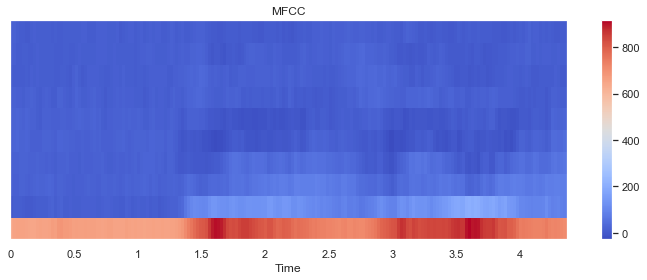

In [96]:
# Extract MFCC feature
mfccs = librosa.feature.mfcc(y=samples.astype('float'), sr=48000, n_mfcc=10)
print("Shape of mfcc features is {}".format(mfccs.shape))
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [97]:
ultrasound = '../Speakers/hanqing/hello-hello/5.wav'
Audio(ultrasound)

(96015,)
48000


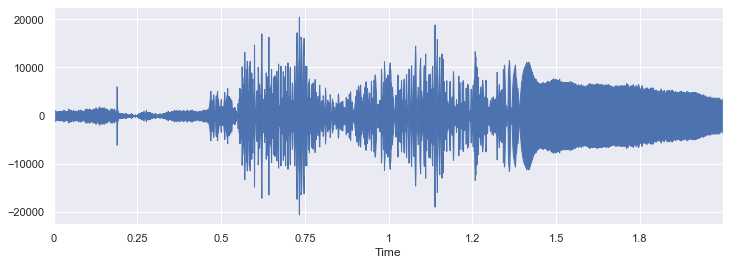

In [98]:
sample_rate, samples1 = scipy.io.wavfile.read(ultrasound) 
print(samples.shape)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples1.astype('float'), sr=sample_rate)
print(sample_rate)
plt.show()

Shape of mfcc features is (10, 188)


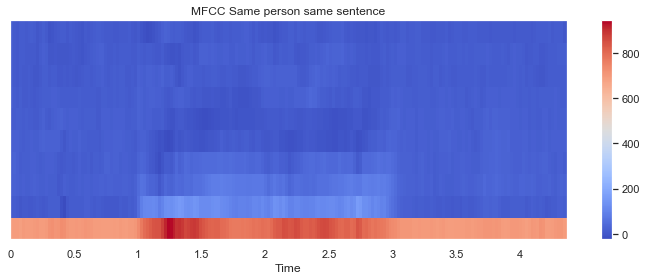

In [99]:
mfccs = librosa.feature.mfcc(y=samples1.astype('float'), sr=48000, n_mfcc=10)
print("Shape of mfcc features is {}".format(mfccs.shape))
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC Same person same sentence')
plt.tight_layout()
plt.show()

In [100]:
ultrasound = '../Speakers/jianzhi/h1.wav'
Audio(ultrasound)

Shape of mfcc features is (10, 188)


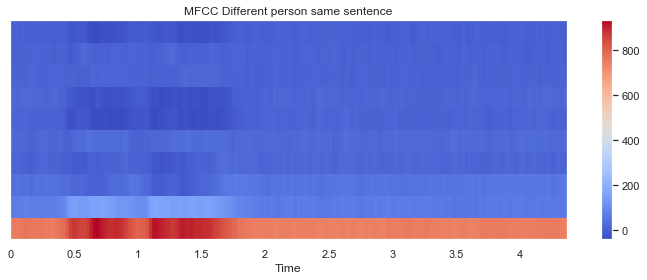

In [101]:
# Different person, same sentence
ultrasound = '../Speakers/jianzhi/h1.wav'
sample_rate, samples2 = scipy.io.wavfile.read(ultrasound) 
mfccs = librosa.feature.mfcc(y=samples2.astype('float'), sr=48000, n_mfcc=10)
print("Shape of mfcc features is {}".format(mfccs.shape))
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC Different person same sentence')
plt.tight_layout()
plt.show()

In [102]:
ultrasound = '../Speakers/jianzhi/msu1.wav'
Audio(ultrasound)

Shape of mfcc features is (10, 188)


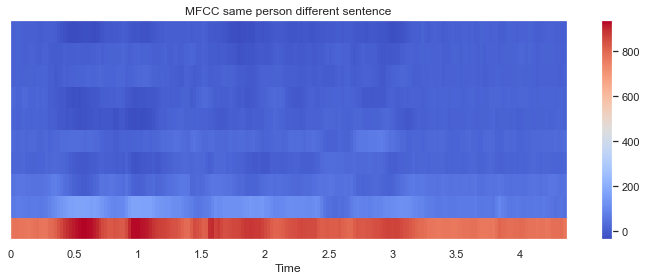

In [104]:
sample_rate, samples3 = scipy.io.wavfile.read(ultrasound) 
mfccs = librosa.feature.mfcc(y=samples3.astype('float'), sr=48000, n_mfcc=10)
print("Shape of mfcc features is {}".format(mfccs.shape))
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC same person different sentence')
plt.tight_layout()
plt.show()

Shape of mfcc features is (10, 188)


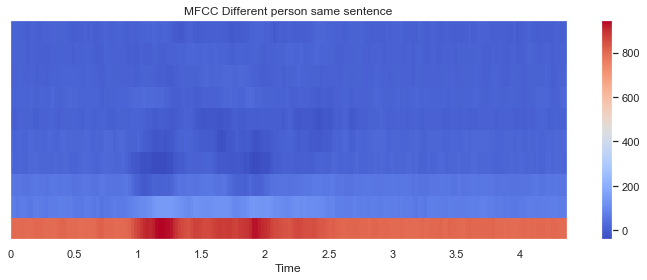

In [105]:
# Different person, same sentence
ultrasound = '../Speakers/xiao/xiao/hello1.wav'
sample_rate, samples4 = scipy.io.wavfile.read(ultrasound) 
mfccs = librosa.feature.mfcc(y=samples4.astype('float'), sr=48000, n_mfcc=10)
print("Shape of mfcc features is {}".format(mfccs.shape))
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC Different person same sentence')
plt.tight_layout()
plt.show()

Shape of mfcc features is (10, 188)


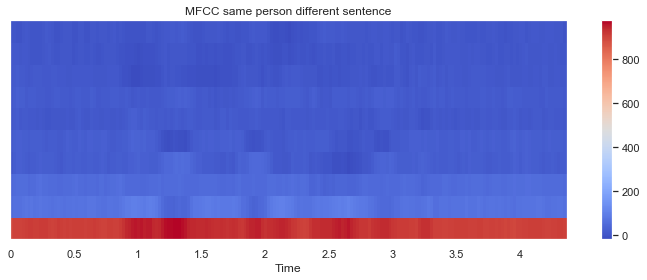

In [108]:
# Different person, same sentence
ultrasound = '../Speakers/xiao/xiao/test1-2m.wav'
sample_rate, samples5 = scipy.io.wavfile.read(ultrasound) 
mfccs = librosa.feature.mfcc(y=samples5.astype('float'), sr=48000, n_mfcc=10)
print("Shape of mfcc features is {}".format(mfccs.shape))
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC same person different sentence')
plt.tight_layout()
plt.show()

(40, 188)


c:\users\guohanqi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
c:\users\guohanqi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


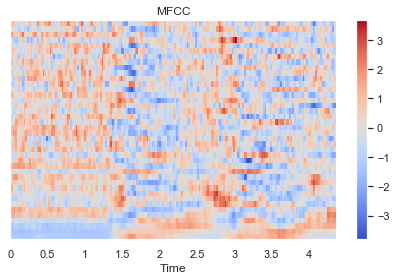

In [80]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.shape)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [106]:
utter_min_len = (tisv_frame*hop_time + window_length_time) * sample_rate
utter_min_len

29200.0

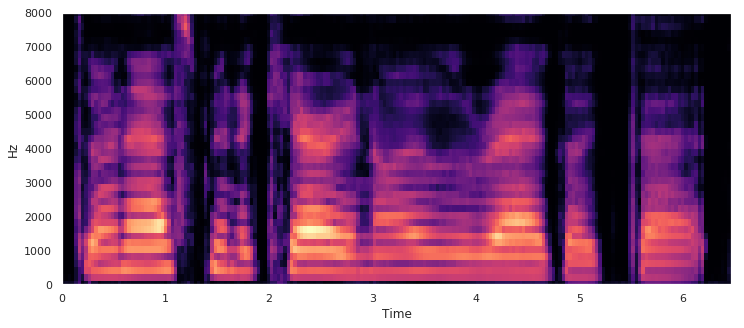

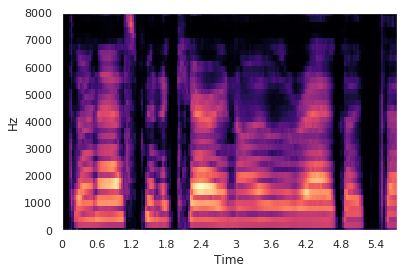

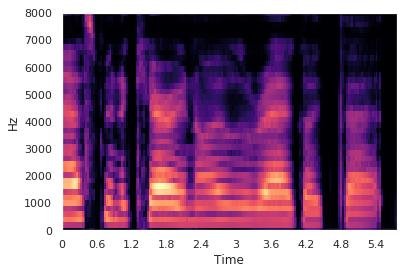

In [110]:
for interval in intervals:
    if(interval[1] - interval[0] > utter_min_len):
        utter_part = samples[interval[0]:interval[1]]
        S = librosa.core.stft(y=utter_part, n_fft=n_fft, win_length=int(window_length_time*sample_rate), hop_length=int(hop_time*sample_rate))
        S = np.abs(S) ** 2
        mel_basis = librosa.filters.mel(sr=sample_rate, n_fft=n_fft, n_mels=40)
        S = np.log10(np.dot(mel_basis, S)+1e-6)
        plt.figure(figsize=(12, 5))
        librosa.display.specshow(S, sr=sample_rate, x_axis='time', y_axis='hz') # whole frames
        plt.show()
        librosa.display.specshow(S[:,:180], sr=sample_rate, x_axis='time', y_axis='hz') # first 180 frames in time
        plt.show()
        librosa.display.specshow(S[:,-180:], sr=sample_rate, x_axis='time', y_axis='hz') # last 180 frames in time
        plt.show()

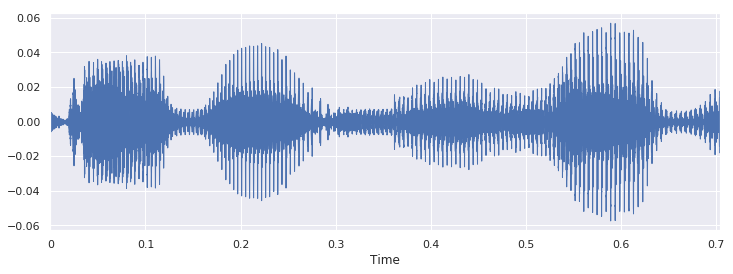

In [83]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples[3584:14848].astype('float'), sr=sample_rate)
plt.show()

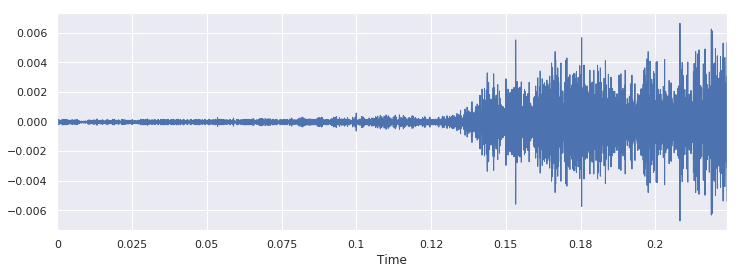

In [85]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples[0:3584].astype('float'), sr=sample_rate)
plt.show()

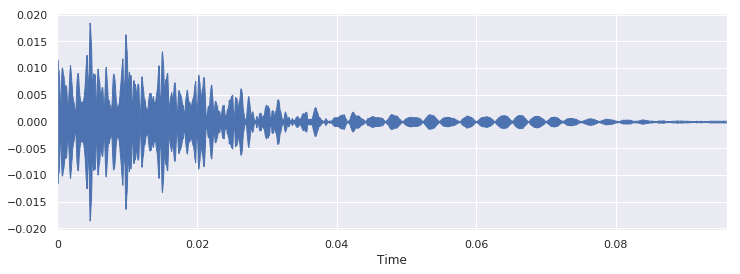

In [86]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples[14848:16384].astype('float'), sr=sample_rate)
plt.show()

(1025, 114)
(1025, 114)


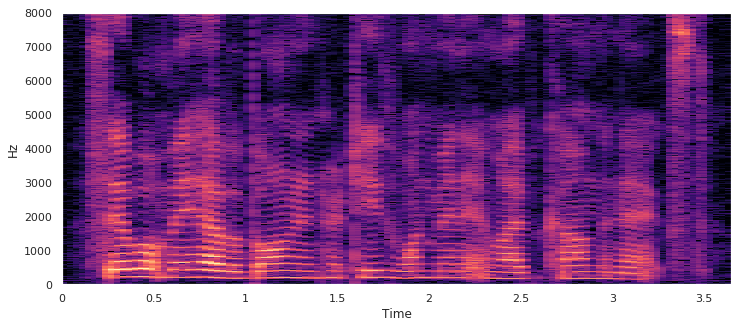

In [74]:
X = librosa.stft(samples.astype('float'))
print(X.shape)
Xdb = librosa.amplitude_to_db(X)
print(Xdb.shape)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.show()

In [25]:
random_fist = first + random.choice(wav_list)
print(random_fist)
Audio(random_fist)


TIMIT/TRAIN/DR1/FCJF0/SX307.WAV.wav


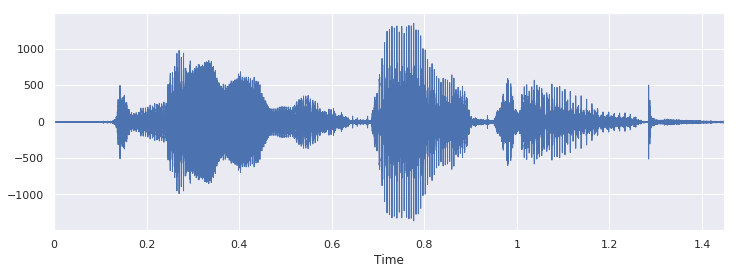

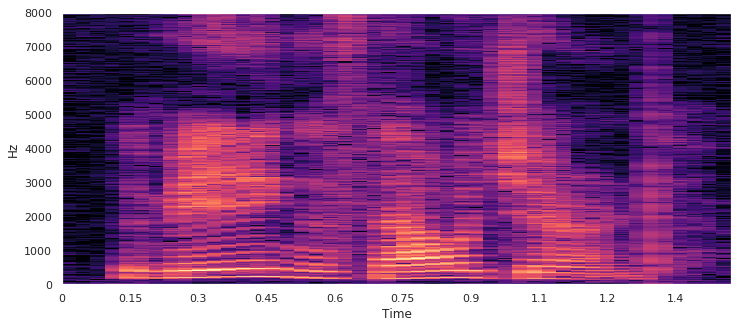

In [26]:
sample_rate, samples = scipy.io.wavfile.read(random_fist)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(samples.astype('float'), sr=sample_rate)
plt.show()
X = librosa.stft(samples.astype('float'))
Xdb = librosa.amplitude_to_db(X)
plt.figure(figsize=(12, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.show()